In [1]:
%matplotlib widget

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
import scipy.stats as st
from pathlib import Path
import numpy as np


In [3]:
#pull in CSV df - 2019 through 2021 - vehicle csv

csv_path2019 = Path("Resources/vehicle_2019.csv")
csv_path2020 = Path("Resources/vehicle_2020.csv")
csv_path2021 = Path("Resources/vehicle_2021.csv")

vehicle2019_df = pd.read_csv(csv_path2019, encoding='cp1252', low_memory=False)
vehicle2020_df = pd.read_csv(csv_path2020, encoding='cp1252', low_memory=False)
vehicle2021_df = pd.read_csv(csv_path2021, encoding='cp1252', low_memory=False)


In [4]:
# Data of motorcycle registration numbers cleaned and displayed

motorcycle_df = pd.read_csv("Resources/motorcycles.csv")

motorcycle_clean= motorcycle_df.drop(0)
column_names = motorcycle_clean.iloc[0].fillna("State")
motorcycle_clean.columns = column_names
motorcycle_clean = motorcycle_clean.drop([1,54,55])
motorcycles_df = motorcycle_clean[["State", "2019","2020","2021"]]
motor_reg= motorcycles_df.copy()

motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(str).apply(lambda x: x.str.replace(',', ''))
motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(float)


motor_reg.head()



1,State,2019,2020,2021
2,Alabama,173652.0,171077.0,167021.0
3,Alaska,24340.0,23918.0,23068.0
4,Arizona,212951.0,216705.0,222484.0
5,Arkansas,71764.0,70586.0,72474.0
6,California,957620.0,957873.0,952977.0


In [5]:
# Motorcycles that are registered split up by laws

legal_reg = motor_reg.loc[motor_reg["State"] =="California"]

somewhat_legal_reg = motor_reg.loc[motor_reg["State"].isin(["Utah","Hawaii"])]

not_mentioned_reg= motor_reg.loc[motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virgina", "Delaware","Mississippi"])]

illegal_reg = motor_reg.loc[~motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virgina", "Delaware","Mississippi",
                                                                  "California","Utah","Hawaii", "Total"])]

# Count of Registered Motorcycles calculated for all law groups:

legal_reg_2019 = legal_reg.iloc[0, 1]
legal_reg_2020 = legal_reg.iloc[0,2]
legal_reg_2021 = legal_reg.iloc[0,3]
legal_reg_total = legal_reg_2019 + legal_reg_2020 + legal_reg_2021

somewhat_legal_reg_2019 = somewhat_legal_reg.iloc[:,1].sum()
somewhat_legal_reg_2020 = somewhat_legal_reg.iloc[:,2].sum()
somewhat_legal_reg_2021 = somewhat_legal_reg.iloc[:,3].sum()
somewhat_legal_reg_total = somewhat_legal_reg_2019 + somewhat_legal_reg_2020 + somewhat_legal_reg_2021

not_mentioned_reg_2019 = not_mentioned_reg.iloc[:,1].sum()
not_mentioned_reg_2020 = not_mentioned_reg.iloc[:,2].sum()
not_mentioned_reg_2021 = not_mentioned_reg.iloc[:,3].sum()
not_mentioned_reg_total = not_mentioned_reg_2019 + not_mentioned_reg_2020 + not_mentioned_reg_2021

illegal_reg_2019 = illegal_reg.iloc[:, 1].sum()
illegal_reg_2020 = illegal_reg.iloc[:,2].sum()
illegal_reg_2021 = illegal_reg.iloc[:,3].sum()
illegal_reg_total = illegal_reg_2019 + illegal_reg_2020 + illegal_reg_2021




In [6]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Cleaning the data into the important bits
cleaned2019 = vehicle2019_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','L_COMPLNAME']]
cleaned2020 = vehicle2020_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','L_COMPLNAME']]
cleaned2021 = vehicle2021_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','L_COMPLNAME']]


# Renaming columns and filtering them
new_names = {"HARM_EVNAME": "Accident Type", "MAN_COLLNAME": "Vehicle Crash Description", "VNUM_LAN": "Lanes Involved",
             "BODY_TYP": "Vehicle Type ID", "STATENAME": "State Name", "MONTHNAME": "Month Name", "BODY_TYPNAME": "Body Type",
             "DEATHS":"Deaths", "OWNER": "Owner", "MAK_MODNAME": "Make and Model"}
fixed2019 = cleaned2019.rename(columns=new_names)
fixed2020 = cleaned2020.rename(columns=new_names)
fixed2021 = cleaned2021.rename(columns=new_names)

# Filtering for motorcycles and more than 1 lane involved
filtered2019 = fixed2019[(fixed2019['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2019['Lanes Involved'] != 1)]
filtered2020 = fixed2020[(fixed2020['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2020['Lanes Involved'] != 1)]
filtered2021 = fixed2021[(fixed2021['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2021['Lanes Involved'] != 1)]
filtered2021.head(5)

,State Name,Month Name,Body Type,Deaths,Vehicle Type ID,Owner,Make and Model,Accident Type,Vehicle Crash Description,Lanes Involved,L_COMPLNAME
41,Alabama,January,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Kawasaki 450-749cc,Motor Vehicle In-Transport,Front-to-Front,2,Valid license for this class vehicle
89,Alabama,January,Two Wheel Motorcycle (excluding motor scooters),1,80,1,BMW 750cc and over,Motor Vehicle In-Transport,Angle,2,Valid license for this class vehicle
135,Alabama,February,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Kawasaki 450-749cc,Motor Vehicle In-Transport,Angle,2,No valid license for this class vehicle
178,Alabama,March,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Honda 750 cc or greater,Culvert,The First Harmful Event was Not a Collision wi...,5,Valid license for this class vehicle
183,Alabama,March,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Suzuki 750cc-over,Motor Vehicle In-Transport,Angle,3,No valid license for this class vehicle


In [7]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Define function to categorize engine sizes
def categorize_engine_size(engine_size):
    # Ensure engine_size is a string
    engine_size = str(engine_size)
    
    # Extract numeric part of engine size
    engine_size_numeric = ''.join(filter(str.isdigit, engine_size))
    
    if engine_size_numeric and int(engine_size_numeric) < 350:
        return 'Small'
    elif 'cc or greater' in engine_size or 'cc-over' in engine_size:
        return 'Large'
    else:
        return 'Medium'

# Apply the categorize_engine_size function to create a new 'Engine Size Category' column
filtered2019.loc[:, 'Engine Size Category'] = filtered2019['Make and Model'].apply(categorize_engine_size)
filtered2020.loc[:, 'Engine Size Category'] = filtered2020['Make and Model'].apply(categorize_engine_size)
filtered2021.loc[:, 'Engine Size Category'] = filtered2021['Make and Model'].apply(categorize_engine_size)

# Sort these dataframes into their own category
small2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Small'].copy()
medium2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Medium'].copy()
large2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Large'].copy()

small2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Small'].copy()
medium2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Medium'].copy()
large2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Large'].copy()

small2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Small'].copy()
medium2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Medium'].copy()
large2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Large'].copy()

/var/folders/zg/4brng8w568j1m9x6tsv0dhrc0000gn/T/ipykernel_94024/4110903654.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019.loc[:, 'Engine Size Category'] = filtered2019['Make and Model'].apply(categorize_engine_size)
/var/folders/zg/4brng8w568j1m9x6tsv0dhrc0000gn/T/ipykernel_94024/4110903654.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2020.loc[:, 'Engine Size Category'] = filtered2020['Make and Model'].apply(categorize_engine_size)
/var/folders/zg/4brng8w568j1m9x6tsv0dhrc

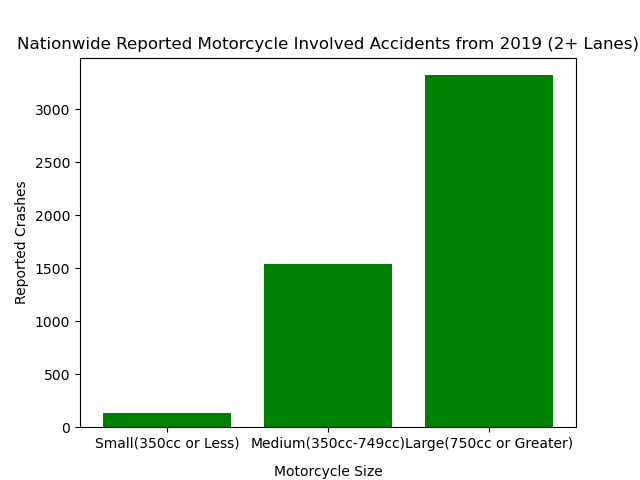

In [8]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2019
small_total_2019 = small2019['Engine Size Category'].count()
medium_total_2019 = medium2019['Engine Size Category'].count()
large_total_2019 = large2019['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2019, medium_total_2019, large_total_2019]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'g')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2019 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

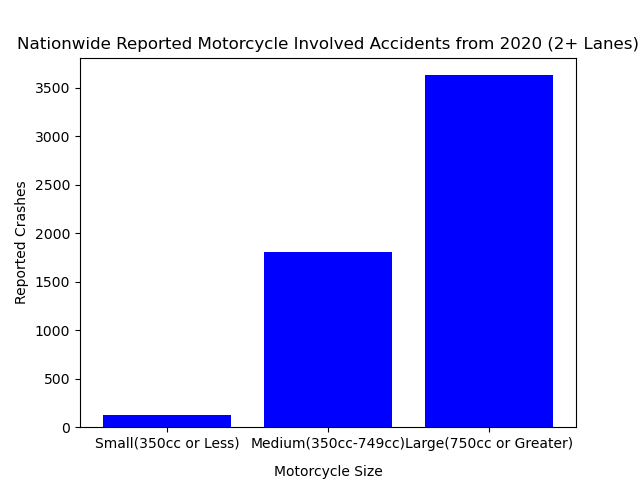

In [9]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2020
small_total_2020 = small2020['Engine Size Category'].count()
medium_total_2020 = medium2020['Engine Size Category'].count()
large_total_2020 = large2020['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2020, medium_total_2020, large_total_2020]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'b')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2020 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

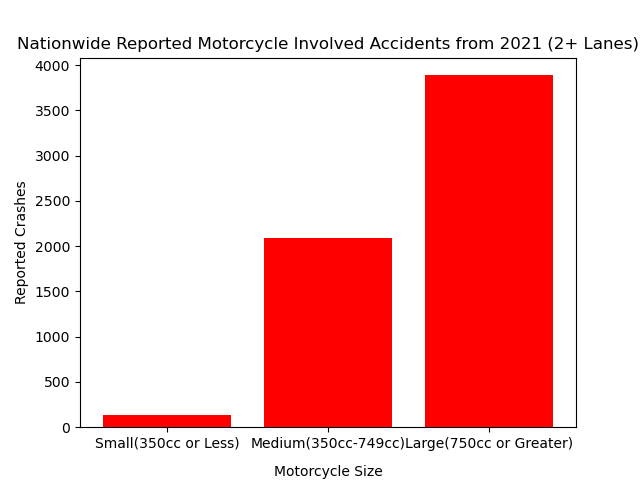

In [10]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2021
small_total_2021 = small2021['Engine Size Category'].count()
medium_total_2021 = medium2021['Engine Size Category'].count()
large_total_2021 = large2021['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2021, medium_total_2021, large_total_2021]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'r')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2021 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

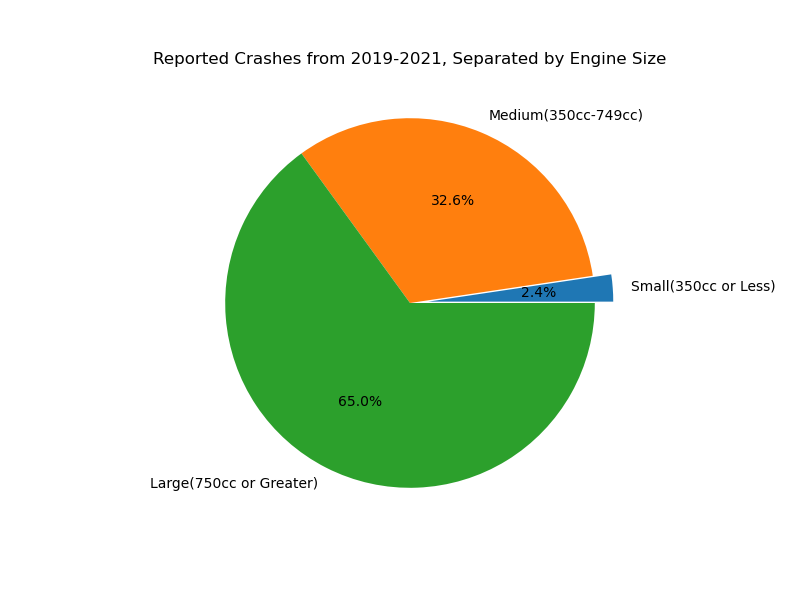

In [11]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Combine all years for a pie chart
small_dfs = [small2019, small2020, small2021]
medium_dfs = [medium2019, medium2020, medium2021]
large_dfs = [large2019, large2020, large2021]

combined_small_df = pd.concat(small_dfs)
combined_medium_df = pd.concat(medium_dfs)
combined_large_df = pd.concat(large_dfs)

# Getting the totals
#concatenated_df = pd.concat([combined_small_df, combined_medium_df, combined_large_df])
#accident_counts = concatenated_df['Deaths'].count()
# Getting the totals
small_overall = combined_small_df['Deaths'].count()
medium_overall = combined_medium_df['Deaths'].count()
large_overall = combined_large_df['Deaths'].count()

pie_values = [small_overall, medium_overall, large_overall]
explode = (0.1, 0, 0)
# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_values, labels=xnames, autopct='%1.1f%%', explode=explode)
plt.title('Reported Crashes from 2019-2021, Separated by Engine Size')
plt.show()

In [12]:
# Calvin

# These are death totals!!

groupa = [small_total_2019, small_total_2020, small_total_2021]
groupb = [medium_total_2019, medium_total_2020, medium_total_2021]
groupc = [large_total_2019, large_total_2020, large_total_2021]

group_anova2 = st.f_oneway(groupa, groupb, groupc)
smallvlarge = st.ttest_ind(groupa,groupc,equal_var=False)
smallvmed = st.ttest_ind(groupa,groupb,equal_var=False)
medvlarge = st.ttest_ind(groupb, groupc, equal_var=False)

print(f"The p value for the anova test between all engine sizes is: {group_anova2[1]}")


stat_data = {"Statistical Analysis": ["Small Vs Large", "Small Vs Medium", "Medium Vs Large"], 
             "P Values": [smallvlarge[1],smallvmed[1], medvlarge[1]]}

engine_sizes_deaths_pvals_df = pd.DataFrame(stat_data)

engine_sizes_deaths_pvals_df.to_csv("Output/engine_sizes_deaths_pvals.csv", index = False)

engine_sizes_deaths_pvals_df.head()

The p value for the anova test between all engine sizes is: 4.806075820764222e-06


,Statistical Analysis,P Values
0,Small Vs Large,0.002208
1,Small Vs Medium,0.008732
2,Medium Vs Large,0.001405


# Small Discussion on Engine Sizes  *leaving this in for history*
Our data isn't really the greatest here. Turns out, the "ID" we've been using to identify motorcycles isn't just 80, but it ranges from 80 to 94 (excluding 88, 89, 91 92, and 93). When I realized this, and tried working with it, I found out that whoever was reporting the crashes wasn't always 100% accurate, and they just defaulted to 80 for a majority of the incidents (which is technically supposed to be sport bikes...). I bring this up because they were also a little lazy with engine sizes, as there's technically codes in the huge csv file for this as well, however most of the time it gets defaulted to a few, which is frustrating as I had to delete huge blocks of code and start from scratch. So, I went with what was printed in the make and model column (MAK_MODNAME) and while this works, it seems to have bias on 750cc or greater, and so the data may not be so reliable.
Despite all that, from my own experience I can say that the results sort of make sense. Scooters for example aren't usually ridden by individuals comfortable with lane filtering or slow speed control, and a good majority of motorcycles I can recognize on the road seem to be on the larger side. I'm going to leave this data as-is because I don't really see a better solution for my question, and I don't think this is going to dock us any serious points, if any.

In [13]:
# Motorcycle laws affects deadly crashes (Jack)

# Filter the dataframes for each year for appropriate columns

df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DEATHS','OWNER','VNUM_LAN']]
    motorcycle_df = cleaned_df.loc[(cleaned_df['BODY_TYP'].between(80, 87)) & (cleaned_df['VNUM_LAN']!= 1)]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DEATHS'] > 0)]

    filtered_df_list.append(final_filter_df)



In [14]:
# Motorcycle laws affects deadly crashes (Jack) 

# add filtered data frames to law groups for all years:

legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)

    



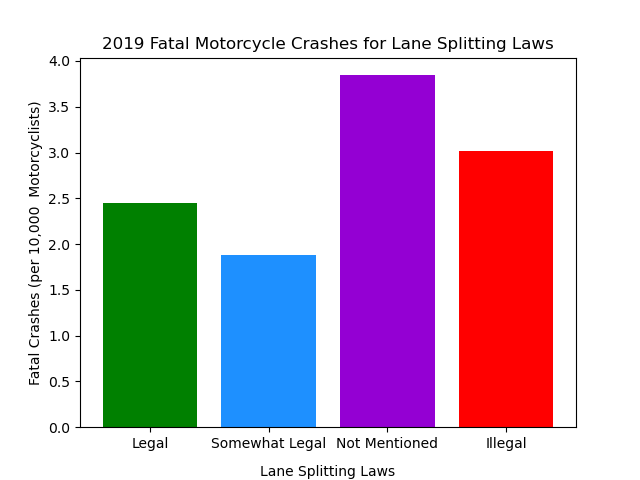

In [15]:
# Motorcycle laws affects deadly crashes 2019 (Jack) 

legal_deaths = legal_group[0]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[0]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[0]["DEATHS"].count()
illegal_deaths = illegal_group[0]["DEATHS"].count()

legal_per_reg_2019 = (legal_deaths / legal_reg_2019) * 10000
somewhat_legal_per_reg_2019 = (somewhat_legal_deaths / somewhat_legal_reg_2019) * 10000
not_mentioned_per_reg_2019 = (not_mentioned_deaths / not_mentioned_reg_2019) * 10000
illegal_per_reg_2019  = (illegal_deaths/ illegal_reg_2019) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2019,somewhat_legal_per_reg_2019, not_mentioned_per_reg_2019, illegal_per_reg_2019]
x_ticks = [value for value in laws]
colors = ["green", "dodgerblue","darkviolet","red"]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = colors)
ax.set_xticks(x_ticks)
ax.set_title("2019 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()

plt.savefig("Output/2019_deaths.png")




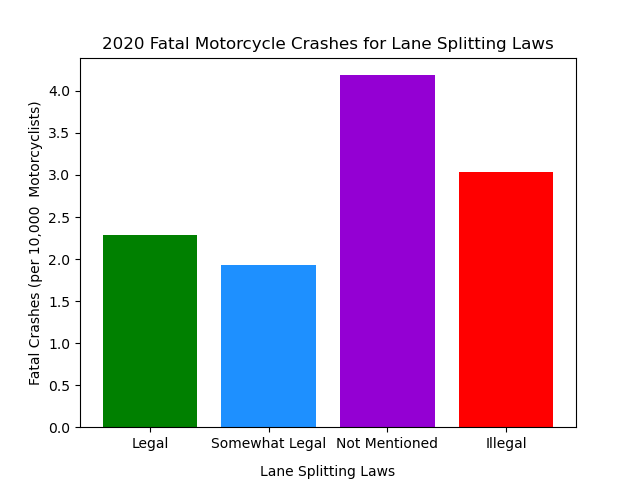

In [16]:
# Motorcycle laws affects deadly crashes 2020 (Jack) 

legal_deaths = legal_group[1]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[1]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[1]["DEATHS"].count()
illegal_deaths = illegal_group[1]["DEATHS"].count()

legal_per_reg_2020 = (legal_deaths / legal_reg_2020) * 10000
somewhat_legal_per_reg_2020 = (somewhat_legal_deaths / somewhat_legal_reg_2020) * 10000
not_mentioned_per_reg_2020 = (not_mentioned_deaths / not_mentioned_reg_2020) * 10000
illegal_per_reg_2020  = (illegal_deaths/ illegal_reg_2020) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2020,somewhat_legal_per_reg_2020, not_mentioned_per_reg_2020, illegal_per_reg_2020]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = colors)
ax.set_xticks(x_ticks)
ax.set_title("2020 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()

plt.savefig("Output/2020_deaths.png")

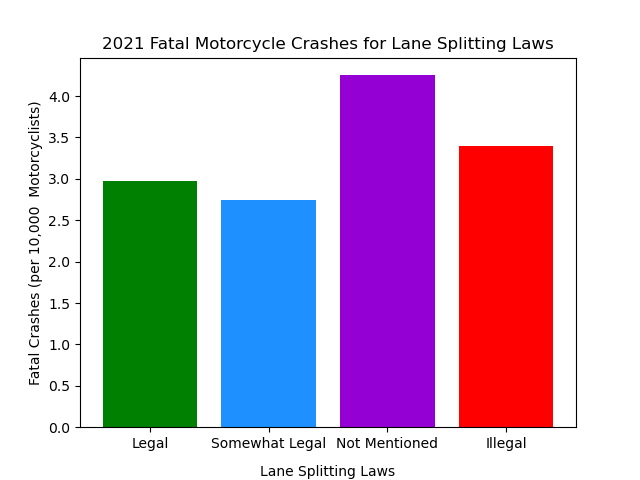

In [17]:
# Motorcycle laws affects deadly crashes 2021 (Jack) 

legal_deaths = legal_group[2]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[2]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[2]["DEATHS"].count()
illegal_deaths = illegal_group[2]["DEATHS"].count()

legal_per_reg_2021 = (legal_deaths / legal_reg_2021) * 10000
somewhat_legal_per_reg_2021 = (somewhat_legal_deaths / somewhat_legal_reg_2021) * 10000
not_mentioned_per_reg_2021 = (not_mentioned_deaths / not_mentioned_reg_2021) * 10000
illegal_per_reg_2021  = (illegal_deaths/ illegal_reg_2021) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2021,somewhat_legal_per_reg_2021, not_mentioned_per_reg_2021, illegal_per_reg_2021]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = colors)
ax.set_xticks(x_ticks)
ax.set_title("2021 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()

plt.savefig("Output/2021_deaths.png")

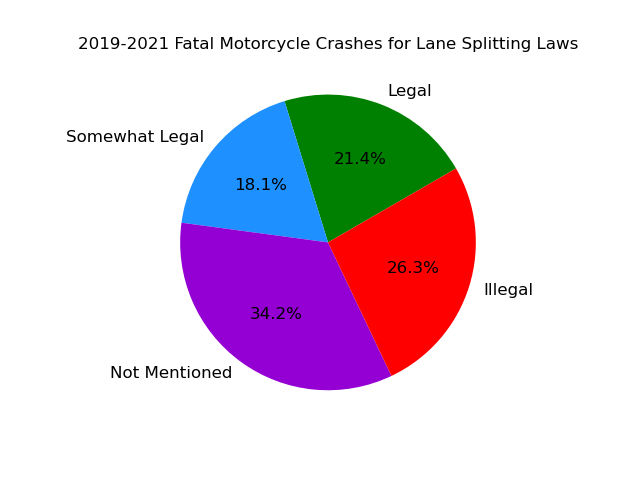

In [18]:
#All Years Pie Chart (Jack)

total_legal_deaths = (sum(len(df) for df in legal_group)/ legal_reg_total) 
total_somewhat_legal_deaths = (sum(len(df) for df in somewhat_legal_group) / somewhat_legal_reg_total) 
total_not_mentioned_deaths = (sum(len(df) for df in not_mentioned_group) / not_mentioned_reg_total) 
total_illegal_deaths = (sum(len(df) for df in illegal_group) / illegal_reg_total) 

group_totals = [total_legal_deaths, total_somewhat_legal_deaths, total_not_mentioned_deaths, total_illegal_deaths]

fig, ax = plt.subplots()
ax.pie(group_totals, labels=laws, colors = colors, autopct='%1.1f%%', textprops = {"fontsize": 12},
       startangle = 30)
ax.set_title("2019-2021 Fatal Motorcycle Crashes for Lane Splitting Laws")
plt.show()



plt.savefig("Output/all_deaths.png")


In [19]:
# statistical testing (Jack)


group1 = [legal_per_reg_2019, legal_per_reg_2020,legal_per_reg_2021]
group2= [somewhat_legal_per_reg_2019, somewhat_legal_per_reg_2020,somewhat_legal_per_reg_2021]
group3 = [not_mentioned_per_reg_2019, not_mentioned_per_reg_2020,not_mentioned_per_reg_2021]
group4 = [illegal_per_reg_2019, illegal_per_reg_2020,illegal_per_reg_2021]

group_anova = st.f_oneway(group1,group2,group3,group4)
legal_vs_illegal = st.ttest_ind(group1,group4,equal_var=False)
legal_vs_somewhat_legal = st.ttest_ind(group1,group2,equal_var=False)
legal_vs_not_mentioned = st.ttest_ind(group1,group3,equal_var=False)

print(f"The p value for the anova test between all law groups is: {group_anova[1]}")


stat_data = {"Statistical Analysis": ["Group Anova Test","Legal vs Illegal", "Legal vs Somewhat Legal", "Legal vs Not Mentioned"], 
             "P Values": [group_anova[1], legal_vs_illegal[1],legal_vs_somewhat_legal[1], legal_vs_not_mentioned[1]]}

stat_df = pd.DataFrame(stat_data)



stat_df.to_csv("Output/stats.csv", index = False)

stat_df

The p value for the anova test between all law groups is: 0.0006079889993435002


,Statistical Analysis,P Values
0,Group Anova Test,0.000608
1,Legal vs Illegal,0.087803
2,Legal vs Somewhat Legal,0.335651
3,Legal vs Not Mentioned,0.005954


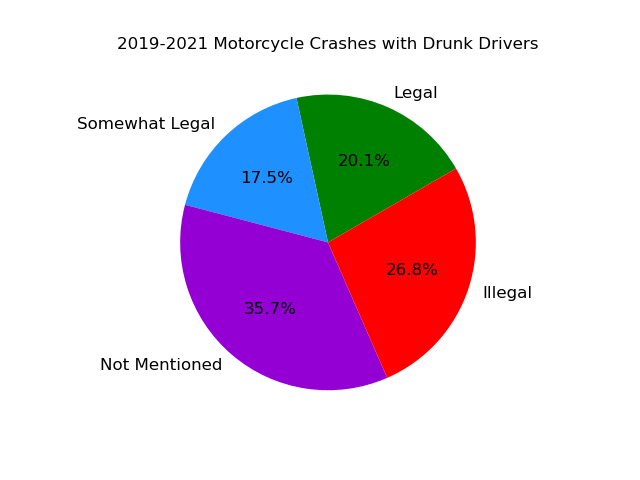

In [20]:
# Pie chart for drunk driving, search for confounding variables (Jack )

df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DR_DRINK','OWNER','VNUM_LAN']]
    motorcycle_df = cleaned_df.loc[(cleaned_df['BODY_TYP'].between(80, 87)) & (cleaned_df['VNUM_LAN']!= 1)]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DR_DRINK'] == 1)]

    filtered_df_list.append(final_filter_df)


legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)



total_legal_drunk = (sum(len(df) for df in legal_group)/ legal_reg_total) 
total_somewhat_legal_drunk = (sum(len(df) for df in somewhat_legal_group) / somewhat_legal_reg_total)
total_not_mentioned_drunk = (sum(len(df) for df in not_mentioned_group) / not_mentioned_reg_total) 
total_illegal_drunk = (sum(len(df) for df in illegal_group) / illegal_reg_total)


drunk_groups = [total_legal_drunk, total_somewhat_legal_drunk, total_not_mentioned_drunk, total_illegal_drunk]


fig, ax = plt.subplots()
ax.pie(drunk_groups, labels=laws, colors = colors, autopct='%1.1f%%', textprops = {"fontsize": 12},
        startangle = 30)
ax.set_title("2019-2021 Motorcycle Crashes with Drunk Drivers")
plt.show()


plt.savefig("Output/all_drunks.png")


    

In [21]:
# Define function to filter and group data
def filter_and_group_data(vehicle_df, person_df):
    cleaned_df = vehicle_df[['STATE','STATENAME','MONTHNAME','MONTH','BODY_TYP','DEATHS','ACC_TYPE','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','INJ_SEV','INJ_SEVNAME']]

    new_names = {"HARM_EVNAME": "Accident Type", "MAN_COLLNAME": "Vehicle Crash Description", "VNUM_LAN": "Lanes Involved",
                 "BODY_TYP": "Vehicle Type ID", "STATENAME": "State Name", "MONTHNAME": "Month Name", "MONTH": "Month", "BODY_TYPNAME": "Body Type",
                 "DEATHS":"Deaths", "OWNER": "Owner", "MAK_MODNAME": "Make and Model","INJ_SEV": "Injury ID","INJ_SEVNAME":"Injury Type"}

    fixed_df = cleaned_df.rename(columns=new_names)

    filtered_df = fixed_df[(fixed_df['Vehicle Type ID'].between(80, 87)) & (fixed_df['Lanes Involved'] != 1)]

    grouped_df = filtered_df.groupby('State Name')['Injury Type'].value_counts().reset_index(name='Count')

    total_count_by_state_df = grouped_df.groupby('State Name')['Count'].sum().reset_index(name='Total Count')

    merged_df = grouped_df.merge(total_count_by_state_df, on='State Name')

    return merged_df

In [22]:
# Define function to categorize states
def categorize_states(injuries_count_df):
    legal_df = injuries_count_df[injuries_count_df['State Name'] == "California"]
    somewhat_legal_df = injuries_count_df[injuries_count_df['State Name'].isin(["Utah", "Hawaii"])]
    illegal_df = injuries_count_df[~injuries_count_df['State Name'].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                          "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                          "North Carolina", "West Virgina", "Delaware", "Mississippi"])]
    not_mentioned_df = injuries_count_df[~injuries_count_df['State Name'].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                                "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                                "North Carolina", "West Virgina", "Delaware", "Mississippi",
                                                                                "California", "Utah", "Hawaii", "Total"])]

    return legal_df, somewhat_legal_df, illegal_df, not_mentioned_df

In [23]:
# Read vehicle data
csv_path2019 = Path("Resources/vehicle_2019.csv")
csv_path2020 = Path("Resources/vehicle_2020.csv")
csv_path2021 = Path("Resources/vehicle_2021.csv")

vehicle2019_df = pd.read_csv(csv_path2019, encoding='cp1252', low_memory=False)
vehicle2020_df = pd.read_csv(csv_path2020, encoding='cp1252', low_memory=False)
vehicle2021_df = pd.read_csv(csv_path2021, encoding='cp1252', low_memory=False)

# Read person data
csv2_path2019 = Path("Resources/Person_2019.csv")
csv2_path2020 = Path("Resources/Person_2020.csv")
csv2_path2021 = Path("Resources/Person_2021.csv")

person2019_df = pd.read_csv(csv2_path2019, encoding='cp1252', low_memory=False)
person2020_df = pd.read_csv(csv2_path2020, encoding='cp1252', low_memory=False)
person2021_df = pd.read_csv(csv2_path2021, encoding='cp1252', low_memory=False)

# Extract injury columns from person data and add them to vehicle data
injuries2019_df = person2019_df[['INJ_SEV', 'INJ_SEVNAME']]
injuries2020_df = person2020_df[['INJ_SEV', 'INJ_SEVNAME']]
injuries2021_df = person2021_df[['INJ_SEV', 'INJ_SEVNAME']]

vehicle2019_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2019_df
vehicle2020_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2020_df
vehicle2021_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2021_df

# Filter and group data for each year
merged2019_df = filter_and_group_data(vehicle2019_df, person2019_df)
merged2020_df = filter_and_group_data(vehicle2020_df, person2020_df)
merged2021_df = filter_and_group_data(vehicle2021_df, person2021_df)

# Categorize states for each year
legal_2019_df, somewhat_legal_2019_df, illegal_2019_df, not_mentioned_2019_df = categorize_states(merged2019_df)
legal_2020_df, somewhat_legal_2020_df, illegal_2020_df, not_mentioned_2020_df = categorize_states(merged2020_df)
legal_2021_df, somewhat_legal_2021_df, illegal_2021_df, not_mentioned_2021_df = categorize_states(merged2021_df)

In [24]:
# Motorcycle  laws affects injuries (Rachael)

#Pull in CSV df - 2019 through 2021 - Person csv
csv2_path2019 = Path("Resources/Person_2019.csv")
csv2_path2020 = Path("Resources/Person_2020.csv")
csv2_path2021 = Path("Resources/Person_2021.csv")

person2019_df = pd.read_csv(csv2_path2019, encoding='cp1252', low_memory=False)
person2020_df = pd.read_csv(csv2_path2020, encoding='cp1252', low_memory=False)
person2021_df = pd.read_csv(csv2_path2021, encoding='cp1252', low_memory=False)

# Extract the "INJ_SEV" and "INJ_SEVNAME" columns from person2019_df
injuries2019 = person2019_df[['INJ_SEV', 'INJ_SEVNAME']]
injuries2020 = person2020_df[['INJ_SEV', 'INJ_SEVNAME']]
injuries2021 = person2021_df[['INJ_SEV', 'INJ_SEVNAME']]

# Add the extracted columns to the fixed DataFrames
vehicle2019_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2019
vehicle2020_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2020
vehicle2021_df[['INJ_SEV', 'INJ_SEVNAME']] = injuries2021

#Clean CSV df - 2019 through 2021 - vehicle csv
cleaned2019 = vehicle2019_df[['STATE','STATENAME','MONTHNAME','BODY_TYP','DEATHS','ACC_TYPE','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','INJ_SEV','INJ_SEVNAME']]
cleaned2020 = vehicle2020_df[['STATE','STATENAME','MONTHNAME','BODY_TYP','DEATHS','ACC_TYPE','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','INJ_SEV','INJ_SEVNAME']]
cleaned2021 = vehicle2021_df[['STATE','STATENAME','MONTHNAME','BODY_TYP','DEATHS','ACC_TYPE','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN','INJ_SEV','INJ_SEVNAME']]

fixed2019 = cleaned2019.rename(columns=new_names)
fixed2020 = cleaned2020.rename(columns=new_names)
fixed2021 = cleaned2021.rename(columns=new_names)

# Filters by potential lane splitting or filtering motorcycles exclusively
filtered2019 = fixed2019[(fixed2019['Vehicle Type ID'] == 80) & (fixed2019['Lanes Involved'] != 1)]
filtered2020 = fixed2020[(fixed2020['Vehicle Type ID'] == 80) & (fixed2020['Lanes Involved'] != 1)]
filtered2021 = fixed2021[(fixed2021['Vehicle Type ID'] == 80) & (fixed2021['Lanes Involved'] != 1)]


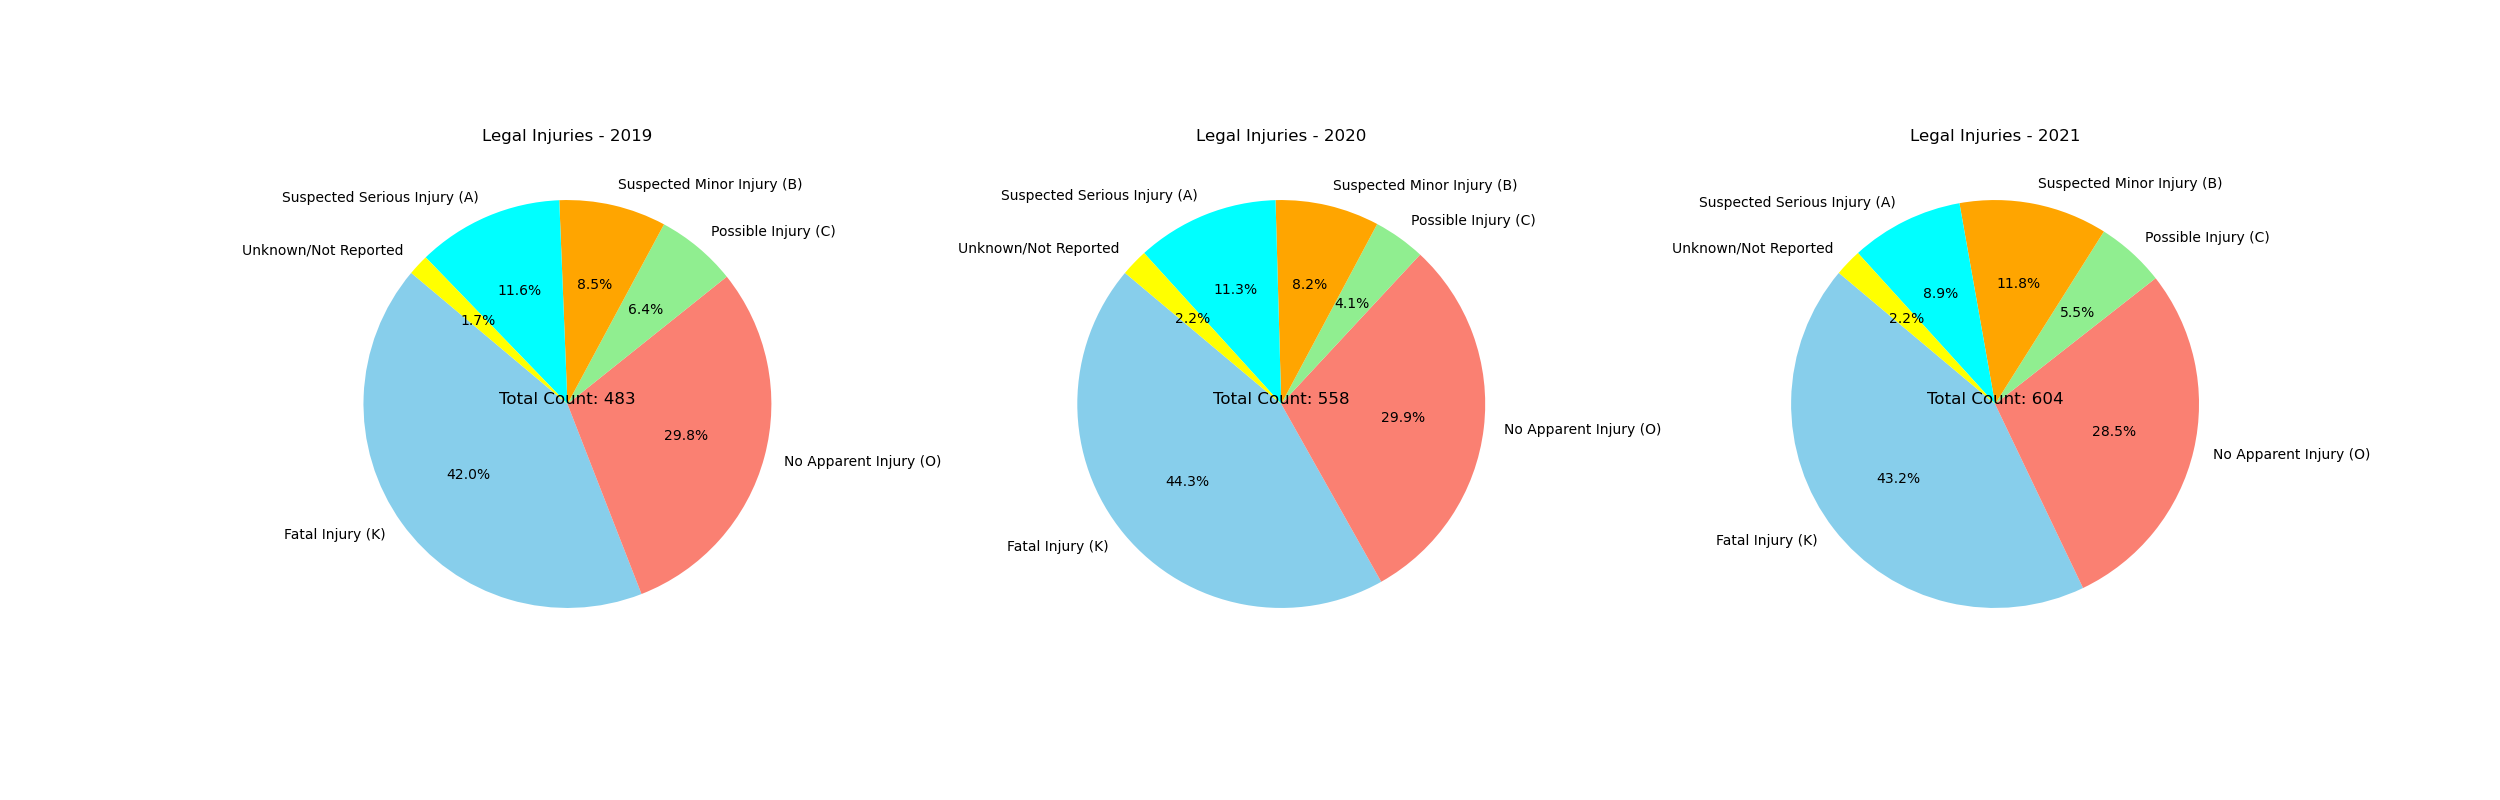

In [25]:
# Visualize data
plt.figure(figsize=(25, 8))

# Legal Pie Charts
years = [2019, 2020, 2021]
for i, legal_df in enumerate([legal_2019_df, legal_2020_df, legal_2021_df]):
    plt.subplot(1, 3, i+1)  # Adjust subplot indexing
    legal_injury_chart = legal_df.groupby("Injury Type")["Count"].sum()
    wedges, _, autotexts = plt.pie(legal_injury_chart, labels=legal_injury_chart.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
    total_count = legal_injury_chart.sum()
    plt.text(0, 0, f'Total Count: {total_count}', color='black', fontsize=12, ha='center')
    plt.title(f'Legal Injuries - {years[i]}')  # Use years list

    plt.subplots_adjust(wspace=0.4)  # Add space between subplots

    plt.show 


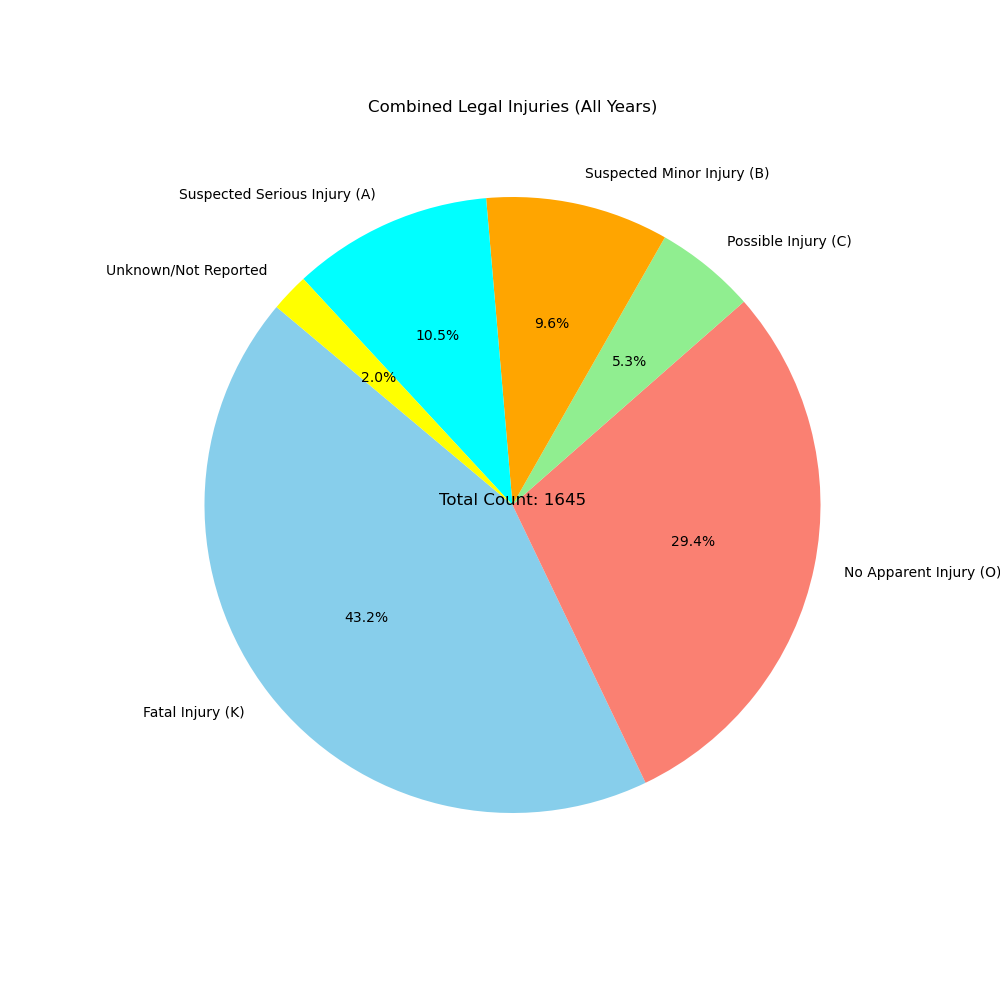

In [26]:
# Concatenate the DataFrames for all years
legal_combined_df = pd.concat([legal_2019_df, legal_2020_df, legal_2021_df], ignore_index=True)

# Calculate the total counts for each injury type
legal_injury_chart_combined = legal_combined_df.groupby("Injury Type")["Count"].sum()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
wedges, _, autotexts = plt.pie(legal_injury_chart_combined, labels=legal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = legal_injury_chart_combined.sum()
plt.text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
plt.title('Combined Legal Injuries (All Years)')  # Set the title of the pie chart

plt.show()

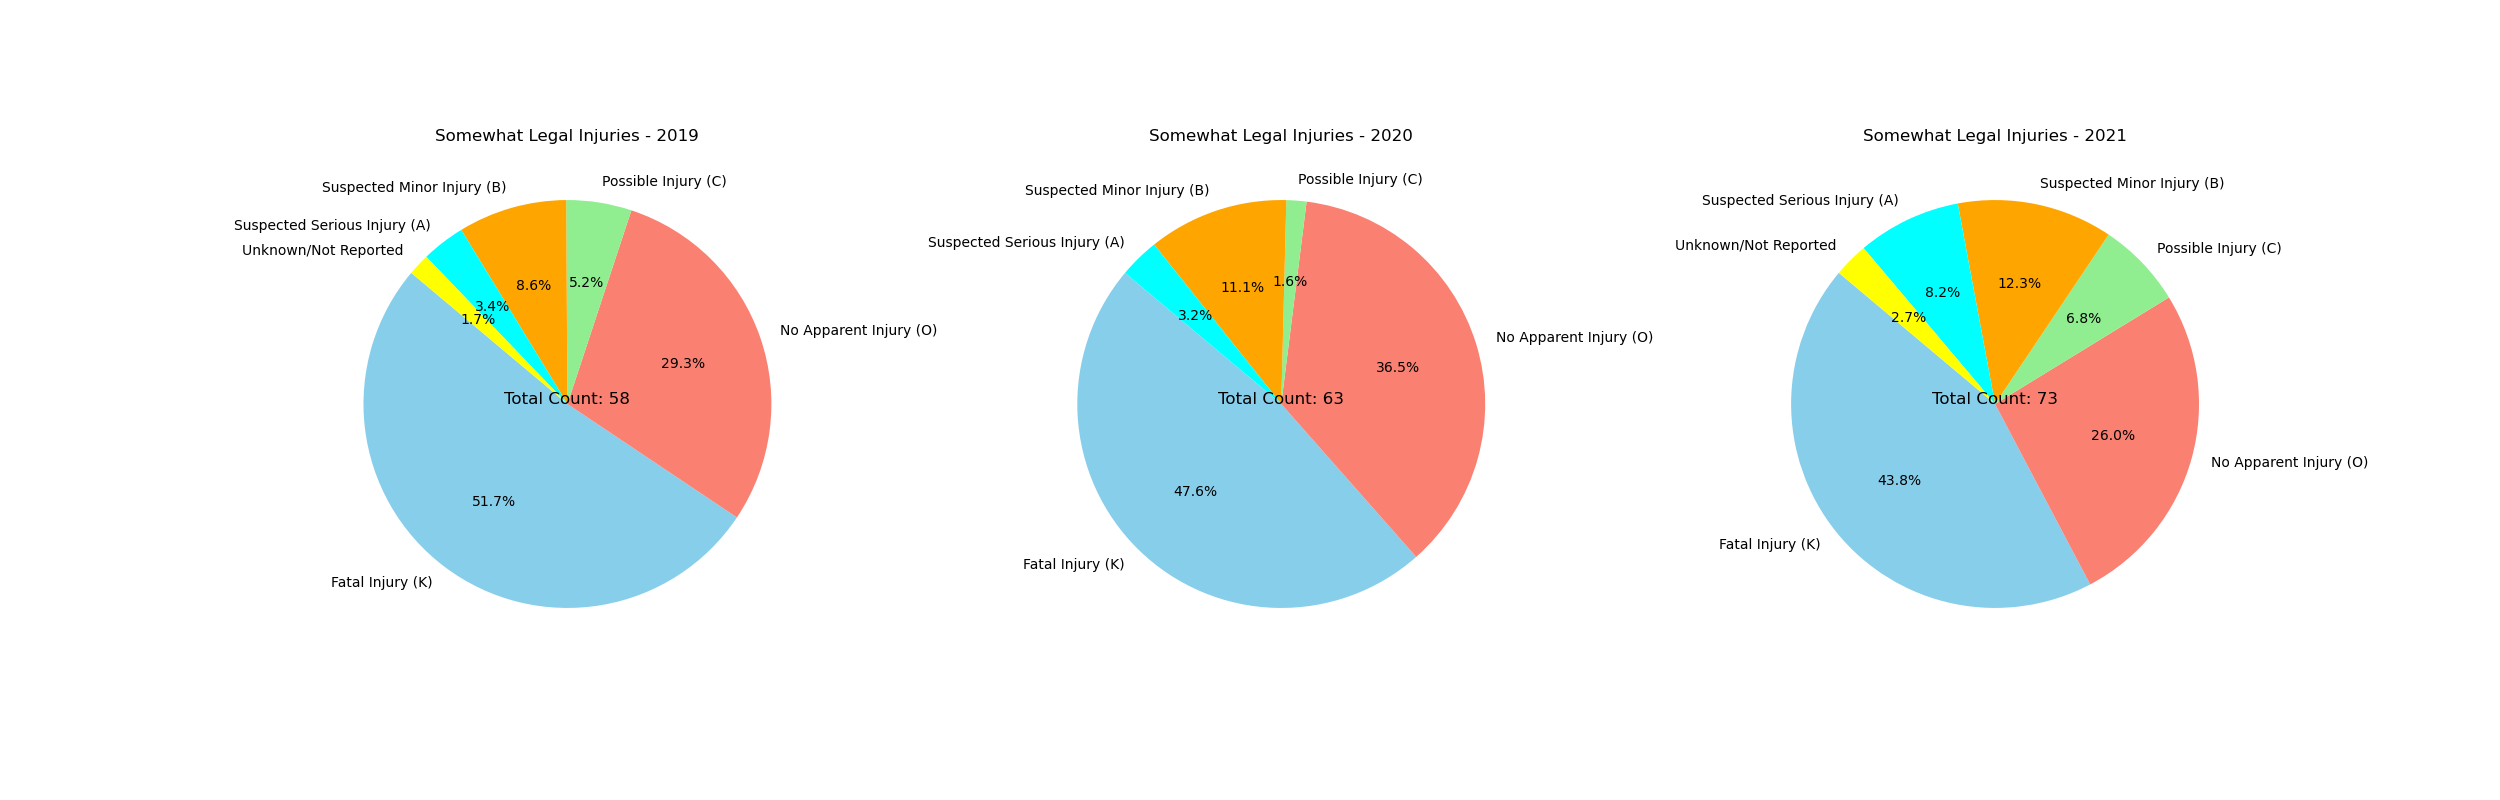

In [27]:
# Visualize data
plt.figure(figsize=(25, 8))

# Legal Pie Charts
years = [2019, 2020, 2021]
for i, somewhat_legal_df in enumerate([somewhat_legal_2019_df, somewhat_legal_2020_df, somewhat_legal_2021_df]):
    plt.subplot(1, 3, i+1)  # Adjust subplot indexing
    somewhat_legal_injury_chart = somewhat_legal_df.groupby("Injury Type")["Count"].sum()
    wedges, _, autotexts = plt.pie(somewhat_legal_injury_chart, labels=somewhat_legal_injury_chart.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
    total_count = somewhat_legal_injury_chart.sum()
    plt.text(0, 0, f'Total Count: {total_count}', color='black', fontsize=12, ha='center')
    plt.title(f'Somewhat Legal Injuries - {years[i]}')  # Use years list

    plt.subplots_adjust(wspace=0.4)  # Add space between subplots

    plt.show 

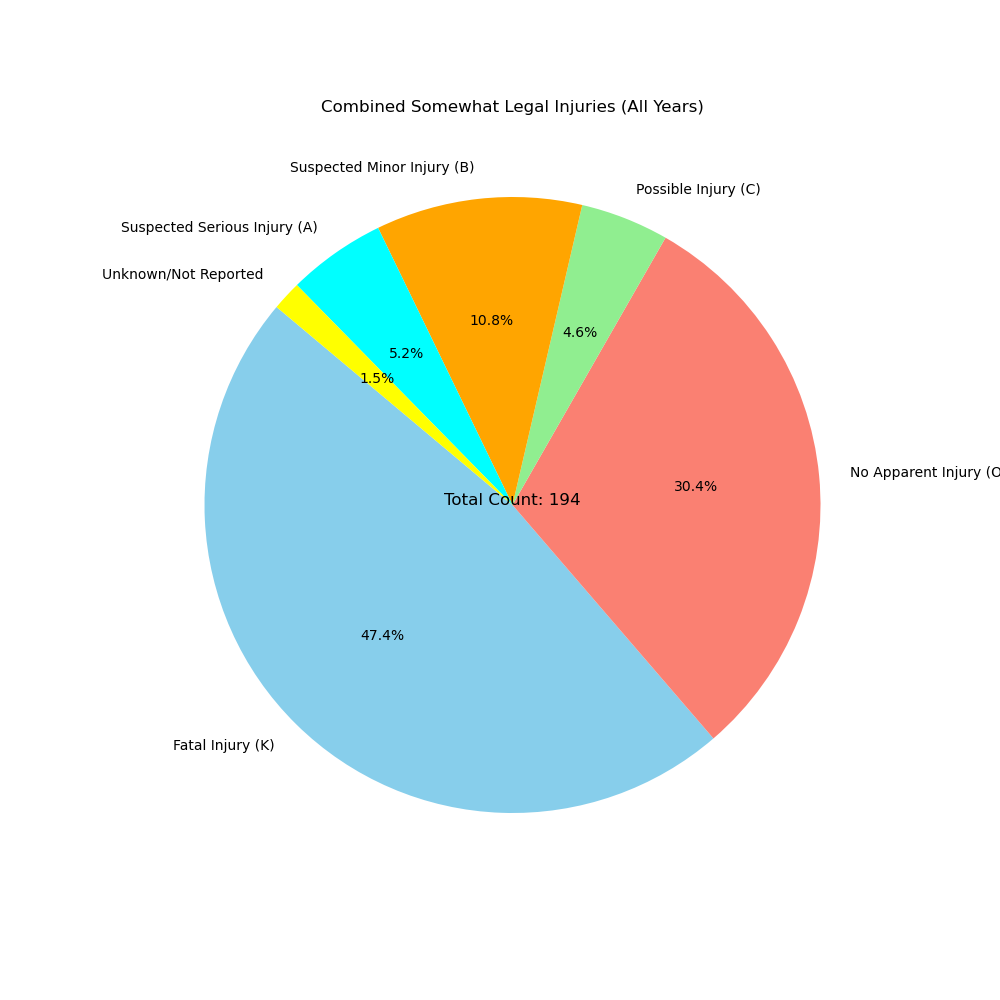

In [28]:
# Concatenate the DataFrames for all years
somewhat_legal_combined_df = pd.concat([somewhat_legal_2019_df, somewhat_legal_2020_df, somewhat_legal_2021_df], ignore_index=True)

# Calculate the total counts for each injury type
somewhat_legal_injury_chart_combined = somewhat_legal_combined_df.groupby("Injury Type")["Count"].sum()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
wedges, _, autotexts = plt.pie(somewhat_legal_injury_chart_combined, labels=somewhat_legal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = somewhat_legal_injury_chart_combined.sum()
plt.text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
plt.title('Combined Somewhat Legal Injuries (All Years)')  # Set the title of the pie chart

plt.show()

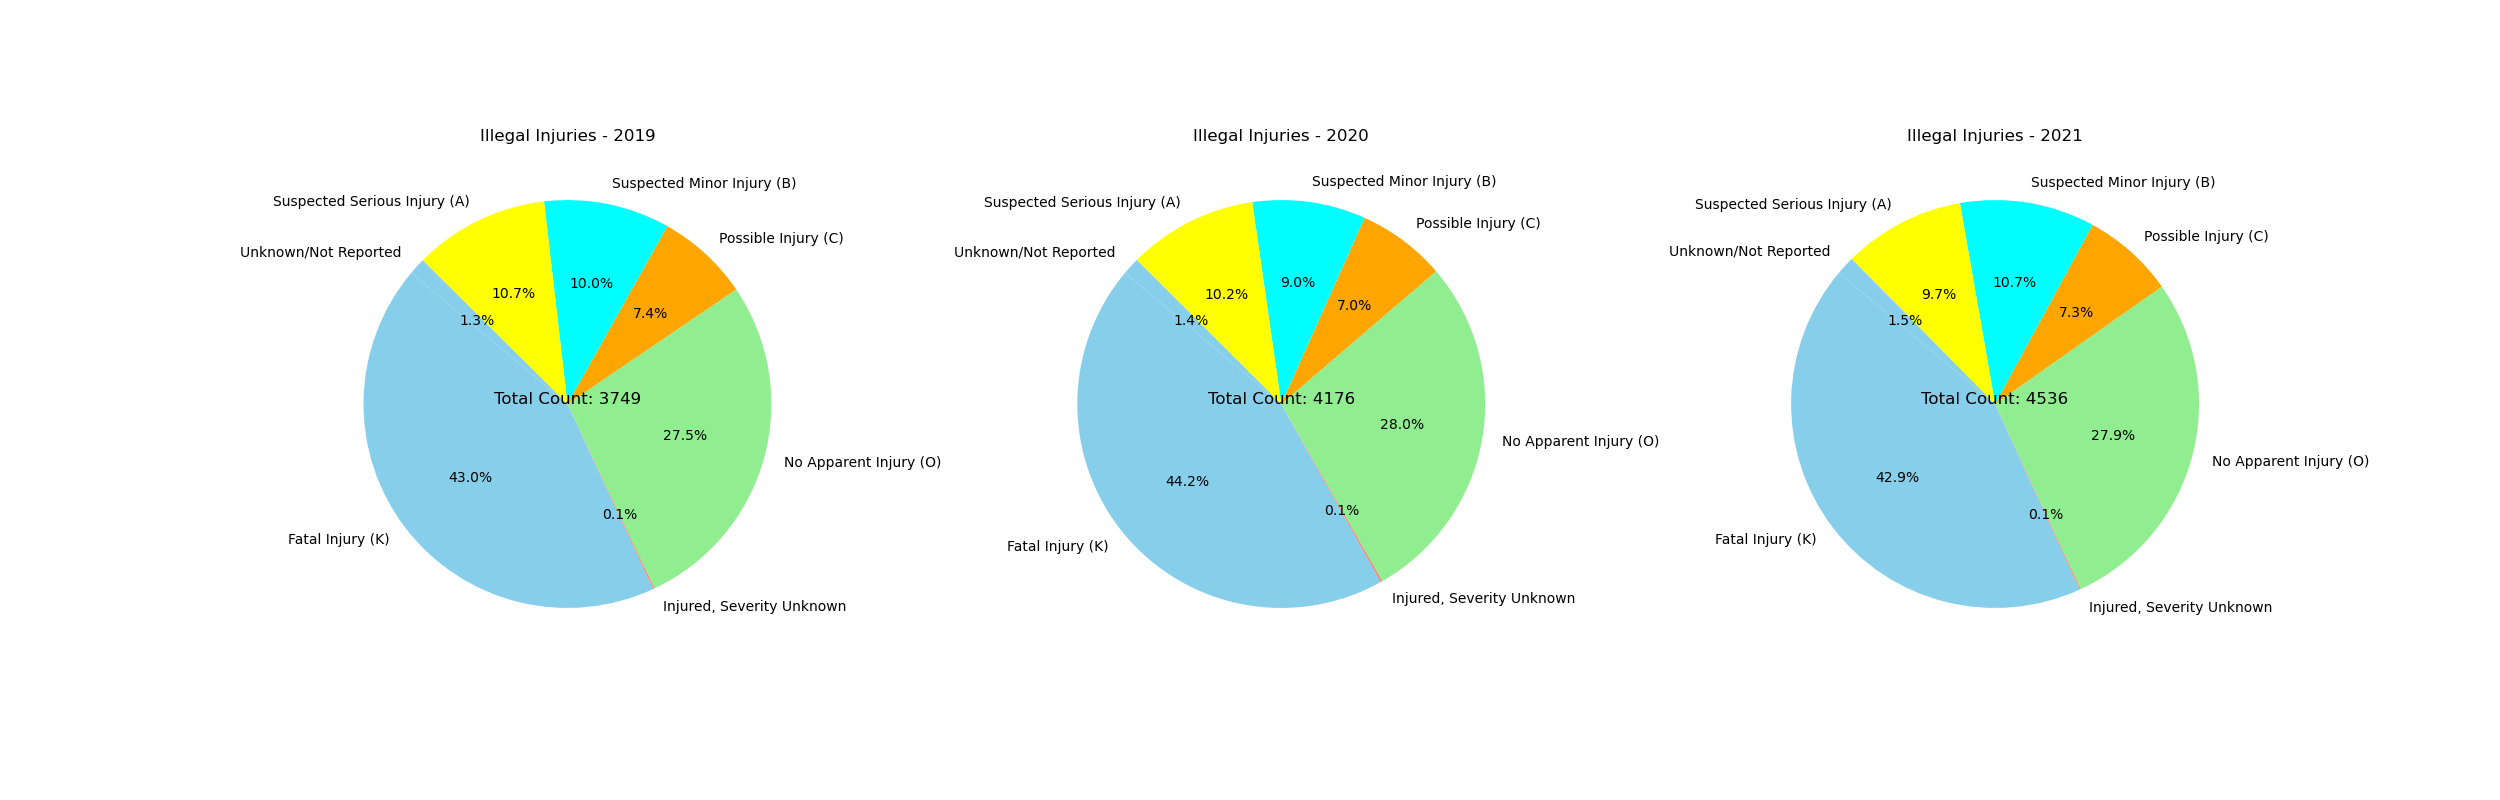

In [29]:
# Visualize data
plt.figure(figsize=(25, 8))

# Illegal Pie Charts
years = [2019, 2020, 2021]
for i, illegal_df in enumerate([illegal_2019_df, illegal_2020_df, illegal_2021_df]):
    plt.subplot(1, 3, i+1)  # Adjust subplot indexing
    illegal_injury_chart = illegal_df.groupby("Injury Type")["Count"].sum()
    wedges, _, autotexts = plt.pie(illegal_injury_chart, labels=illegal_injury_chart.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
    total_count = illegal_injury_chart.sum()
    plt.text(0, 0, f'Total Count: {total_count}', color='black', fontsize=12, ha='center')
    plt.title(f'Illegal Injuries - {years[i]}')  # Use years list

    plt.subplots_adjust(wspace=0.4)  # Add space between subplots

plt.show()

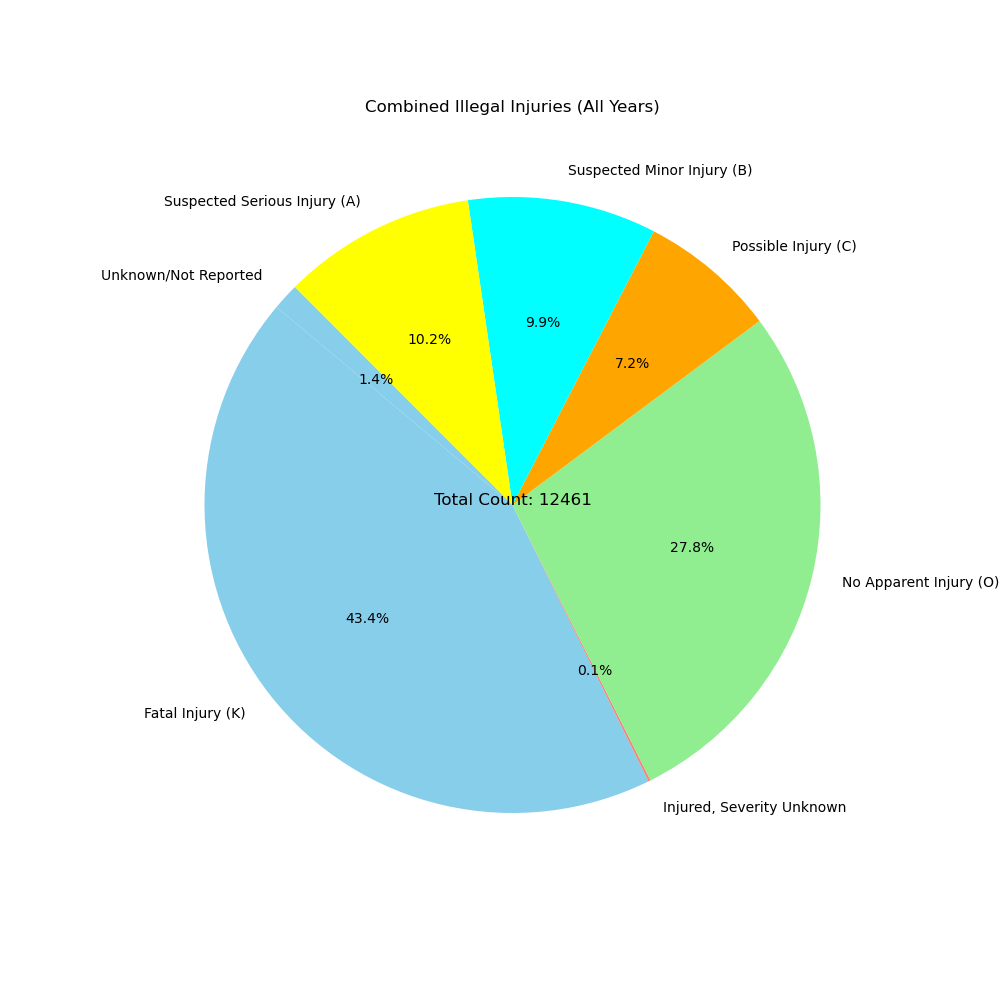

In [30]:
# Concatenate the DataFrames for all years
illegal_combined_df = pd.concat([illegal_2019_df, illegal_2020_df, illegal_2021_df], ignore_index=True)

# Calculate the total counts for each injury type
illegal_injury_chart_combined = illegal_combined_df.groupby("Injury Type")["Count"].sum()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
wedges, _, autotexts = plt.pie(illegal_injury_chart_combined, labels=illegal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = illegal_injury_chart_combined.sum()
plt.text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
plt.title('Combined Illegal Injuries (All Years)')  # Set the title of the pie chart

plt.show()

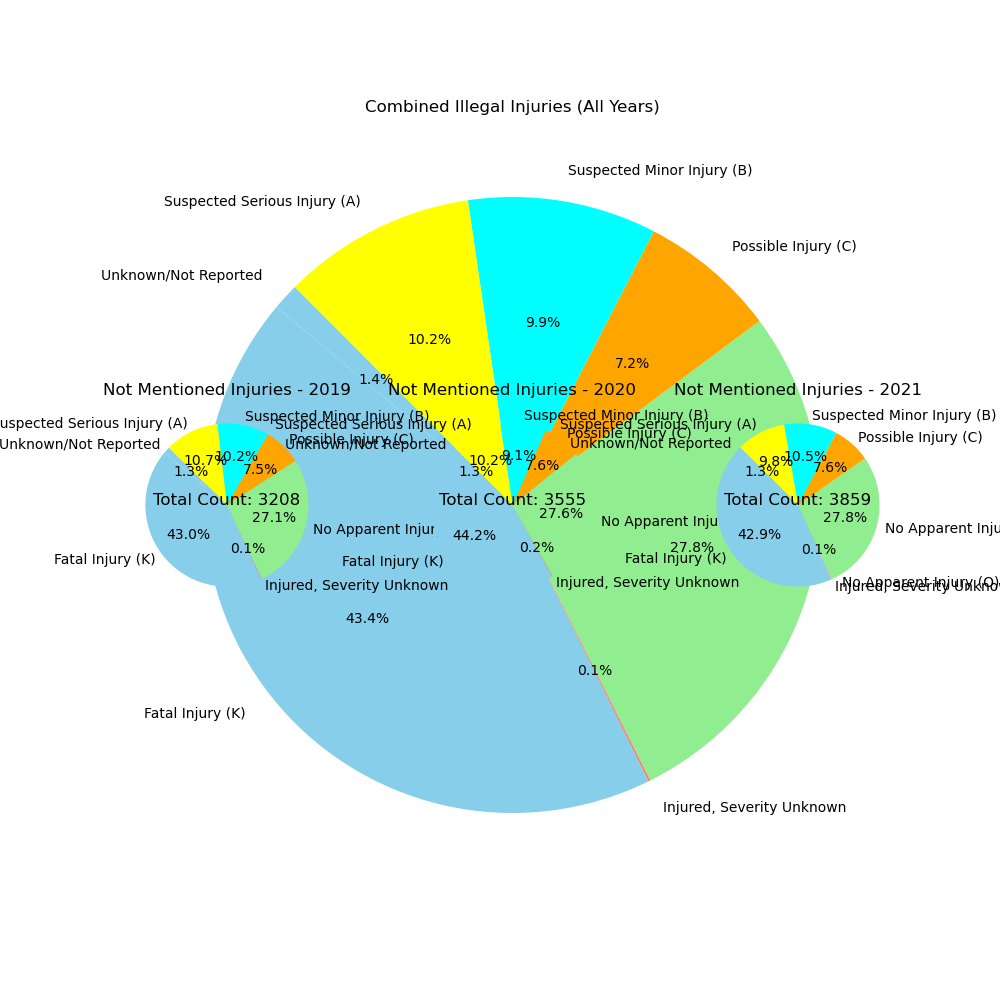

In [31]:
# Not Mentioned Pie Charts
years = [2019, 2020, 2021]
for i, not_mentioned_df in enumerate([not_mentioned_2019_df, not_mentioned_2020_df, not_mentioned_2021_df]):
    plt.subplot(1, 3, i+1)  # Adjust subplot indexing
    not_mentioned_injury_chart = not_mentioned_df.groupby("Injury Type")["Count"].sum()
    wedges, _, autotexts = plt.pie(not_mentioned_injury_chart, labels=not_mentioned_injury_chart.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
    total_count = not_mentioned_injury_chart.sum()
    plt.text(0, 0, f'Total Count: {total_count}', color='black', fontsize=12, ha='center')
    plt.title(f'Not Mentioned Injuries - {years[i]}')  # Use years list

    plt.subplots_adjust(wspace=0.4)  # Add space between subplots

plt.show()

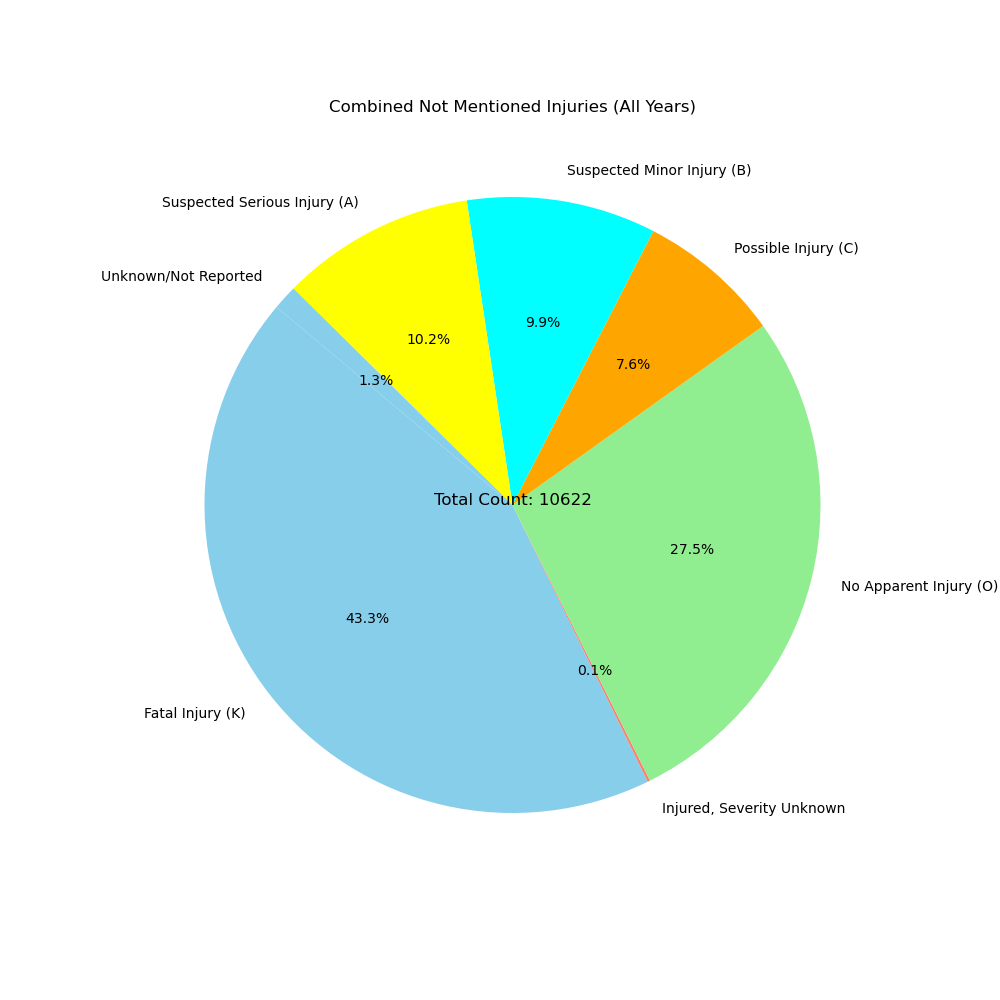

In [32]:
# Concatenate the DataFrames for all years
not_mentioned_combined_df = pd.concat([not_mentioned_2019_df, not_mentioned_2020_df, not_mentioned_2021_df], ignore_index=True)

# Calculate the total counts for each injury type
not_mentioned_injury_chart_combined = not_mentioned_combined_df.groupby("Injury Type")["Count"].sum()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
wedges, _, autotexts = plt.pie(not_mentioned_injury_chart_combined, labels=not_mentioned_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = not_mentioned_injury_chart_combined.sum()
plt.text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
plt.title('Combined Not Mentioned Injuries (All Years)')  # Set the title of the pie chart

plt.show()

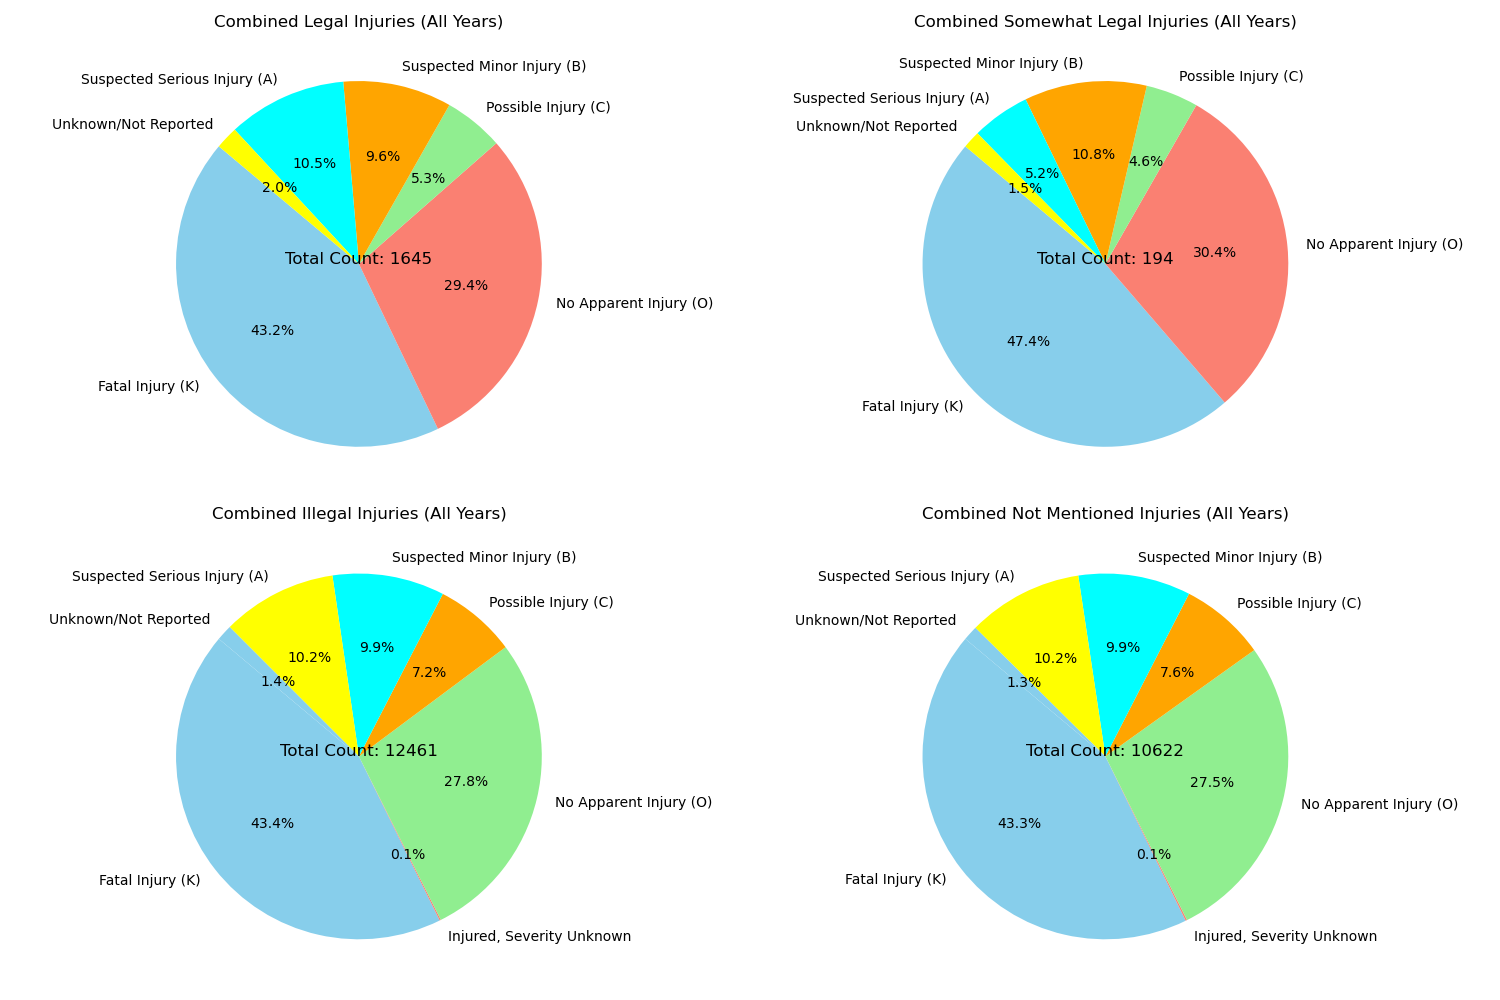

In [33]:
# Concatenate the DataFrames for all years
legal_combined_df = pd.concat([legal_2019_df, legal_2020_df, legal_2021_df], ignore_index=True)
somewhat_legal_combined_df = pd.concat([somewhat_legal_2019_df, somewhat_legal_2020_df, somewhat_legal_2021_df], ignore_index=True)
illegal_combined_df = pd.concat([illegal_2019_df, illegal_2020_df, illegal_2021_df], ignore_index=True)
not_mentioned_combined_df = pd.concat([not_mentioned_2019_df, not_mentioned_2020_df, not_mentioned_2021_df], ignore_index=True)

# Calculate the total counts for each injury type for all combined DataFrames
legal_injury_chart_combined = legal_combined_df.groupby("Injury Type")["Count"].sum()
somewhat_legal_injury_chart_combined = somewhat_legal_combined_df.groupby("Injury Type")["Count"].sum()
illegal_injury_chart_combined = illegal_combined_df.groupby("Injury Type")["Count"].sum()
not_mentioned_injury_chart_combined = not_mentioned_combined_df.groupby("Injury Type")["Count"].sum()

# Create subplots for all pie charts
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Pie chart for Legal Injuries
wedges, _, autotexts = axs[0, 0].pie(legal_injury_chart_combined, labels=legal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = legal_injury_chart_combined.sum()
axs[0, 0].text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
axs[0, 0].set_title('Combined Legal Injuries (All Years)')

# Pie chart for Somewhat Legal Injuries
wedges, _, autotexts = axs[0, 1].pie(somewhat_legal_injury_chart_combined, labels=somewhat_legal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = somewhat_legal_injury_chart_combined.sum()
axs[0, 1].text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
axs[0, 1].set_title('Combined Somewhat Legal Injuries (All Years)')

# Pie chart for Illegal Injuries
wedges, _, autotexts = axs[1, 0].pie(illegal_injury_chart_combined, labels=illegal_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = illegal_injury_chart_combined.sum()
axs[1, 0].text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
axs[1, 0].set_title('Combined Illegal Injuries (All Years)')

# Pie chart for Not Mentioned Injuries
wedges, _, autotexts = axs[1, 1].pie(not_mentioned_injury_chart_combined, labels=not_mentioned_injury_chart_combined.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'aqua', 'yellow'])
total_count_combined = not_mentioned_injury_chart_combined.sum()
axs[1, 1].text(0, 0, f'Total Count: {total_count_combined}', color='black', fontsize=12, ha='center')
axs[1, 1].set_title('Combined Not Mentioned Injuries (All Years)')

plt.tight_layout()
plt.show()

Legal - Mean: 274.1666666666667, Median: 165.5, Standard Deviation: 241.99064490641413
Somewhat Legal - Mean: 32.333333333333336, Median: 15.5, Standard Deviation: 32.41227476675396
Illegal - Mean: 1780.142857142857, Median: 1234.0, Standard Deviation: 1813.585117823764
Not Mentioned - Mean: 1517.4285714285713, Median: 1055.0, Standard Deviation: 1538.676598076863

ANOVA Test:
F-statistic: 2.7291358426394097
P-value: 0.06842706567764102


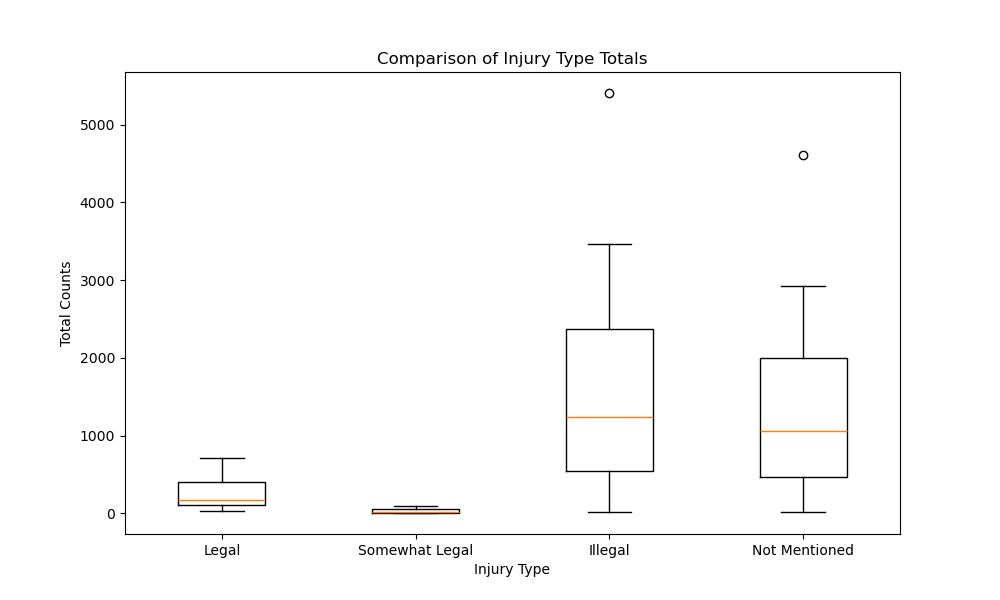

In [36]:
# Calculate summary statistics
totals = {
    "Legal": legal_injury_chart_combined.values,
    "Somewhat Legal": somewhat_legal_injury_chart_combined.values,
    "Illegal": illegal_injury_chart_combined.values,
    "Not Mentioned": not_mentioned_injury_chart_combined.values
}

for label, data in totals.items():
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    print(f"{label} - Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")

# Conduct hypothesis test (e.g., ANOVA)
f_statistic, p_value = st.f_oneway(
    legal_injury_chart_combined.values,
    somewhat_legal_injury_chart_combined.values,
    illegal_injury_chart_combined.values,
    not_mentioned_injury_chart_combined.values
)

print("\nANOVA Test:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Visualize the data (e.g., box plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(totals.values(), labels=totals.keys())
plt.title("Comparison of Injury Type Totals")
plt.xlabel("Injury Type")
plt.ylabel("Total Counts")
plt.show()

In [37]:
# Pie chart for helmet use, search of confounding variables (Jack)

helmet2019 = person2019_df['HELM_USE']
helmet2020 = person2020_df['HELM_USE']
helmet2021 = person2021_df['HELM_USE']

vehicle2019_df['HELM_USE'] = helmet2019
vehicle2020_df['HELM_USE'] = helmet2020
vehicle2021_df['HELM_USE'] = helmet2021


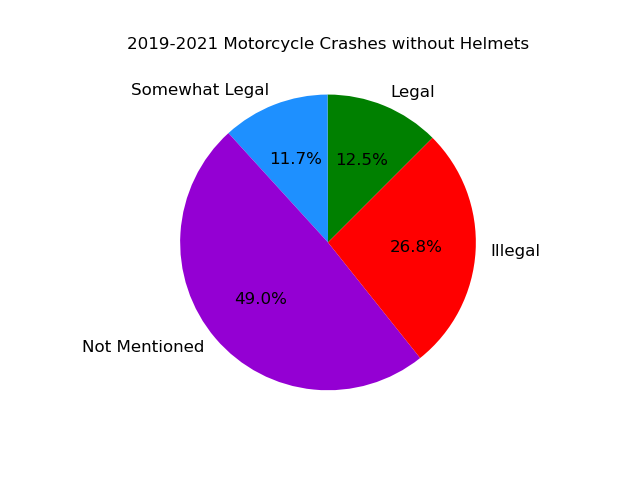

In [39]:
# Pie Chart for Helmet Use

df_list = [vehicle2019_df,vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','HELM_USE','OWNER','VNUM_LAN']]
    motorcycle_df = cleaned_df.loc[(cleaned_df['BODY_TYP'].between(80, 87)) & (cleaned_df['VNUM_LAN']!= 1)]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['HELM_USE'] == 17)]

    filtered_df_list.append(final_filter_df)


legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)


total_legal_helmet = (sum(len(df) for df in legal_group)/ legal_reg_total) 
total_somewhat_legal_helmet = (sum(len(df) for df in somewhat_legal_group) / somewhat_legal_reg_total)
total_not_mentioned_helmet = (sum(len(df) for df in not_mentioned_group) / not_mentioned_reg_total) 
total_illegal_helmet = (sum(len(df) for df in illegal_group) / illegal_reg_total)


helmet_groups = [total_legal_helmet, total_somewhat_legal_helmet, total_not_mentioned_helmet, total_illegal_helmet]

fig, ax = plt.subplots()
ax.pie(helmet_groups, labels=laws, colors = colors, autopct='%1.1f%%',  textprops={"fontsize": 12},
       startangle=45 )
ax.set_title("2019-2021 Motorcycle Crashes without Helmets")
plt.show()


plt.savefig("Output/no_helmet.png")


